In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [59]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1=nn.Conv2d(1,6,kernel_size=5,stride=1,padding=2)
        self.relu=nn.ReLU()
        self.pool=nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(6,16,kernel_size=5,stride=1)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x=self.pool(self.relu(self.conv1(x)))
        x=self.pool(self.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [60]:
batch_size=64
epochs=10
lr=0.001


### Data Loading and Transformation

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=torchvision.datasets.MNIST(root='~/Projects/Programming/Dataset/',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='~/Projects/Programming/Dataset/',train=False,download=True,transform=transform)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

### Model Loss and Optimizer

In [62]:
model=LeNet5()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr)

In [63]:
train_losses,test_accuracies=[],[]

for epoch in range(epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        result=model(images)
        loss=criterion(result,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss=running_loss/len(train_loader)
    train_losses.append(avg_loss)

    print(f"Epoch {epoch+1}/{epochs}")

    model.eval()
    correct,total=0,0
    with torch.no_grad():
        for images,labels in test_loader:
            outputs=model(images)
            _,predicted=torch.max(outputs,1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()
    accuracy=100*correct/total
    test_accuracies.append(accuracy)
    print(f"Accuracy on test set: {accuracy:.2f}%")

Epoch 1/10
Accuracy on test set: 97.44%
Epoch 2/10
Accuracy on test set: 98.54%
Epoch 3/10
Accuracy on test set: 98.77%
Epoch 4/10
Accuracy on test set: 98.68%
Epoch 5/10
Accuracy on test set: 98.84%
Epoch 6/10
Accuracy on test set: 98.90%
Epoch 7/10
Accuracy on test set: 99.05%
Epoch 8/10
Accuracy on test set: 99.02%
Epoch 9/10
Accuracy on test set: 98.95%
Epoch 10/10
Accuracy on test set: 99.02%


Text(0.5, 1.0, 'Test Accuracies Over Epochs')

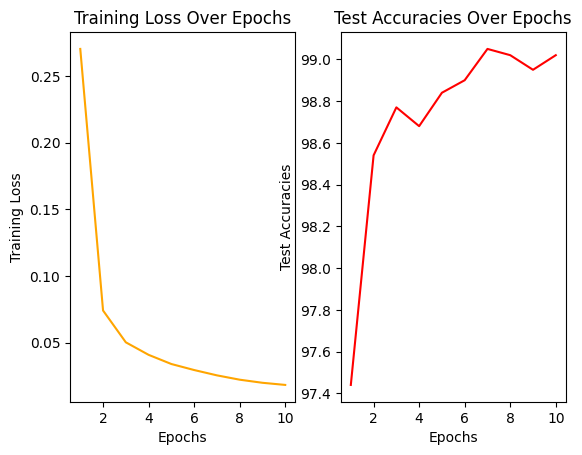

In [67]:
plt.Figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_losses,color="orange")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")

plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),test_accuracies,color='red')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracies")
plt.title("Test Accuracies Over Epochs")

### Inference Function

In [68]:
def predict_image(image):
    model.eval()
    with torch.no_grad():
        output=model(image)
        _,predicted=torch.max(output,1)
    return predicted.item()

### Visualizing Predictions

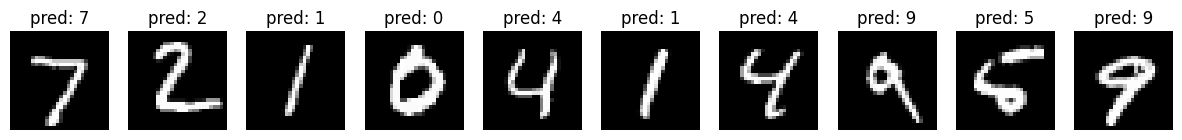

In [69]:
samples,labels=next(iter(test_loader))
predictions=[predict_image(img) for img in samples[:10]]

fig,axes=plt.subplots(1,10,figsize=(15,4))
for i,ax in enumerate(axes):
    ax.imshow(samples[i].cpu().squeeze(),cmap="grey")
    ax.set_title(f"pred: {predictions[i]}")
    ax.axis('off')

plt.show() 